[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

## Загрузка ранее сохраненного ДФ

In [2]:
conn = sqlite3.connect('data/test_database.db')
df = pd.read_sql('SELECT * FROM real_estate', conn,
                 parse_dates=['objReady100PercDt','developer.orgBankruptMsgDttm'])
conn.commit()
conn.close()

# Преобразования ДФ

In [3]:
'''
Переименовываем колонки, т.к. текущее название не всегда очевидно
'''
df = df.rename(columns={'objElemLivingCnt' : 'flat_count',
                        'objReady100PercDt': 'date_obj_ready',
                        'wallMaterialShortDesc' : 'wall_material',
                        'objLkFinishTypeDesc': 'flat_finish_type',
                        'objLkFreePlanDesc' : 'free_plan',
                        'objElemParkingCnt' : 'parking_count',
                        'objLkClassDesc' : 'class',
                        'objFlatSq' : 'flat_square',
                        'objInfrstrBicycleLaneFlg' : 'bicycle_lane',
                        'objInfrstrRampFlg' : 'ramp_for_disabled',
                        'objInfrstrCurbLoweringFlg' : 'lowering_for_disabled',
                        'nonlivFirstFloor' : 'first_floor_commercial',
                        'developer.devId' : 'developer_id',
                        'objReadyDesc' : 'ready_status',
                        'quartography.objLivElemEntrFloorAvg' : 'avg_flat_on_floor',
                        'quartography.objLivElemEntrCnt' : 'entrance_count',
                        'quartography.objLivElemCnt' : 'total_flat',
                        'quartography.objLivElem1KCnt' : 'total_1k',
                        'quartography.objLivElem2KCnt' : 'total_2k',
                        'quartography.objLivElem3KCnt' : 'total_3k',
                        'quartography.objLivElem4KCnt' : 'total_4k',
                        'objLivCeilingHeight' : 'ceiling_height',
                        'developer.problObjCnt' : 'developer_problem_obj',
                        'developer.regRegionDesc' : 'developer_region',
                        'developer.bankruptStage.bankruptStageDesc' : 'developer_bankrupt_stage',
                        'developer.orgBankruptMsgDttm' : 'developer_bankrupt_date',
                        'residentialBuildings' : 'build_type',
                        'objInfrstrPlaygrndCnt' : 'playground',
                        'objInfrstrSportGroundCnt' : 'sportground',
                        'objInfrstrTrashAreaCnt' : 'trash_area',
                        'objInfrstrObjPrkngCnt' : 'guest_parking_on_territory',
                        'objInfrstrNotObjPrkngCnt' : 'guest_parking_outside',
                        'objElevatorWheelchairCnt' : 'wheelchair_elevator',
                        'objElevatorPassengerCnt' : 'passenger_elevator',
                        'objElevatorCargoCnt' : 'cargo_elevator',
                        'developer.devShortNm' : 'developer_name'
                        })

In [4]:
"""
Оставляем только полезные, на первый взгляд, столбцы, и столбцы информация в которых не дублируется
"""
df = df[['id', 'region', 'floorMin', 'floorMax', 'flat_count', 'ready_status',
         'date_obj_ready', 'build_type', 'wall_material', 'flat_finish_type',
         'free_plan', 'parking_count', 'class', 'flat_square',
         'bicycle_lane', 'ramp_for_disabled', 'lowering_for_disabled',
         'first_floor_commercial', 'developer_id', 'developer_name', 'developer_problem_obj',
         'developer_region','objPriceAvg','total_1k', 'total_2k', 'total_3k', 'total_4k',
         'total_flat', 'entrance_count', 'avg_flat_on_floor', 'ceiling_height',
         'playground', 'sportground', 'trash_area', 'guest_parking_on_territory',
         'guest_parking_outside', 'wheelchair_elevator', 'passenger_elevator',
         'cargo_elevator', 'developer_bankrupt_stage', 'developer_bankrupt_date',
         ]]

In [7]:
"""
Смотрим получившуюся структуру данных. Столбцы 50, 51 оставим,
т.к. там содержится информация о банкротствах
И сбросим индекс строк, на всякий случай
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30532 entries, 0 to 30531
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          30532 non-null  float64       
 1   region                      30532 non-null  float64       
 2   floorMin                    30097 non-null  float64       
 3   floorMax                    30173 non-null  float64       
 4   flat_count                  30518 non-null  float64       
 5   ready_status                27602 non-null  object        
 6   date_obj_ready              30521 non-null  datetime64[ns]
 7   build_type                  30532 non-null  float64       
 8   wall_material               30532 non-null  object        
 9   flat_finish_type            30532 non-null  object        
 10  free_plan                   29538 non-null  object        
 11  parking_count               30499 non-null  float64   

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
"""
Далее преобразуем float в int для тех колонок, в которых не предусмотрено
дробных значений. Преобразовались не все, но для работы достаточно.
flat_square преобразуем в float
"""

df.flat_square = df.flat_square.apply(float)
for i in df:
    if i not in ['ready_status', 'date_obj_ready', 'wall_material',
             'flat_finish_type', 'free_plan', 'class', 'flat_square',
             'objEnergyEffShortDesc', 'infrastructureIndexValue',
             'developer_region', 'developer_group', 'soldOutPerc', 'objPriceAvg', 'ceiling_height',
             'developer_bankrupt_stage', 'developer_bankrupt_date', 'developer_name']:
        df[[i]] = df[[i]].applymap(int, na_action='ignore')

# Анализ ДФ. Информация по проблемным застройщикам и количество банкротств

In [10]:
'''
Выберем застройщиков, которые имеют проблемные недостроенные объекты
(фонды, которые занимаются достройкой объектов исключаем)
'''

search_fund = df['developer_problem_obj'][df['developer_name'].str.contains(r".*ФОНД.*") == False]
search_fund2 = df['developer_problem_obj'][df['developer_name'].str.contains(r".*ЗАЩИТЫ.*") == False]
problem_developer = df[['developer_name', 'developer_problem_obj']]\
    [(df.developer_problem_obj > 1) & search_fund & search_fund2]\
    .sort_values('developer_problem_obj', ascending=False)

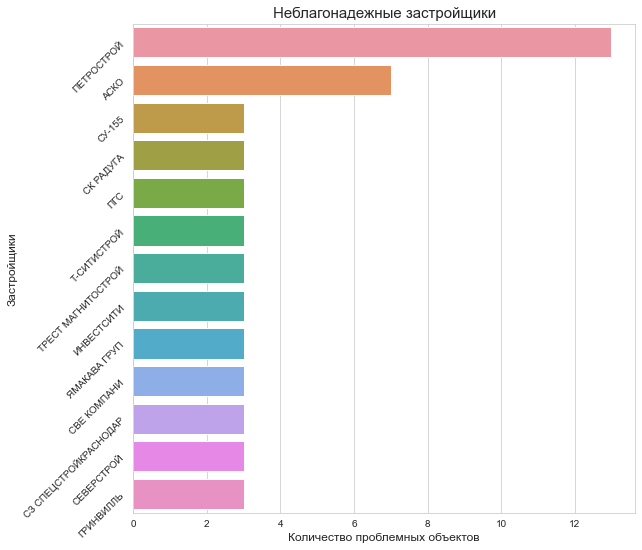

In [11]:
'''
Возглавляют рейтинг: ПЕТРОСТРОЙ и АСКО.
Остальные застройщики имеют по 3 недостроенных объекта
'''
plt.figure(figsize=(9, 9))
pl = sns.barplot(data=problem_developer,
                x='developer_problem_obj', y='developer_name')
pl.yaxis.set_tick_params(rotation=45)
pl.set_ylabel('Застройщики', fontsize=12)
pl.set_xlabel('Количество проблемных объектов', fontsize=12)
plt.title('Неблагонадежные застройщики',fontsize=15)
plt.show()

In [12]:
"""
Теперь выведем наиболее эффективные фонды
"""
search_fund = df['developer_problem_obj'][df['developer_name'].str.contains(r".*ФОНД.*")]
search_fund2 = df['developer_problem_obj'][df['developer_name'].str.contains(r".*ЗАЩ.*")]
best_fund = df[['developer_name', 'developer_problem_obj']]\
    [(df.developer_problem_obj > 1) &  search_fund | search_fund2]\
    .sort_values('developer_problem_obj', ascending=False)
best_fund.developer_name.unique()[:3]

array(['ФОНД ЛО', 'ФОНД ЗАЩИТЫ ПРАВ ДОЛЬЩИКОВ КУБАНИ',
       'ФОНД ЗАЩИТЫ ПРАВ ГРАЖДАН-УЧАСТНИКОВ СТРОИТЕЛЬСТВА ПК'],
      dtype=object)

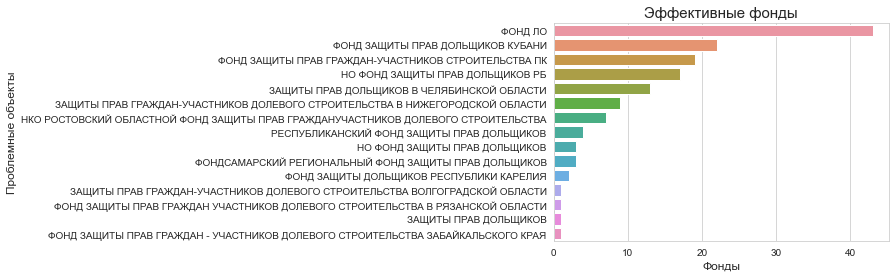

In [13]:
"""
Наиболее эффективным фондом, с большим отрывом, является фонд ЛО
"""
pl = sns.barplot(data=best_fund,
                x='developer_problem_obj', y='developer_name')
pl.set_ylabel('Проблемные объекты', fontsize=12)
pl.set_xlabel('Фонды', fontsize=12)
plt.title('Эффективные фонды',fontsize=15)
plt.show()

In [14]:
"""
Проанализируем количество банкротств информация по которым загружена с 2014 года
"""
bankrupts = df.copy()
bankrupts['year_of_bankrupt'] = pd.DatetimeIndex(bankrupts.developer_bankrupt_date).year
bankrupts = bankrupts[bankrupts['year_of_bankrupt'] > 1900].groupby('year_of_bankrupt', as_index=False)\
                                                .agg({'developer_id' : 'count'})\
                                                .rename(columns={'developer_id' : 'count_of_bankrupts'})
bankrupts.sort_values('count_of_bankrupts', ascending=False).head(3)

,year_of_bankrupt,count_of_bankrupts
6,2020.0,176
5,2019.0,123
4,2018.0,117


In [15]:
(bankrupts.sort_values('count_of_bankrupts', ascending=False).count_of_bankrupts.iloc[3]/\
bankrupts.sort_values('count_of_bankrupts', ascending=False).count_of_bankrupts.iloc[4] - 1) * 100

15.384615384615374

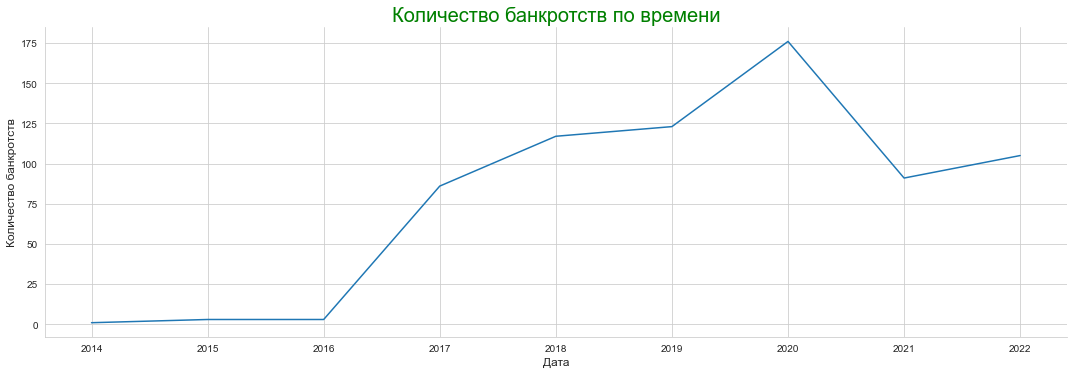

In [16]:
pl = sns.relplot(
    x='year_of_bankrupt',
    y='count_of_bankrupts',
    data=bankrupts,
    kind='line',
    aspect=3
)
plt.title('Количество банкротств по времени', size=20, color='g')
pl.set_ylabels('Количество банкротств', fontsize=12)
pl.set_xlabels('Дата', fontsize=12)
plt.show()

Исходя из представленного графика видно, что с 2014 года наблюдается рост числа банкротств.
Пик приходится на 2020 год.
Несмотря на то, что 2022 год еще не завершился, количество банкротств уже более чем на 15% превышает показатели 2021 года

In [17]:
df[df.developer_bankrupt_date > '1900-01-01'].groupby('region', as_index=False)\
                        .agg({'id' : 'count'})\
                        .rename(columns={'id': 'count_of_bankrupts'})\
                        .sort_values('count_of_bankrupts', ascending=False).head(3)

,region,count_of_bankrupts
32,50,151
52,77,82
31,47,82


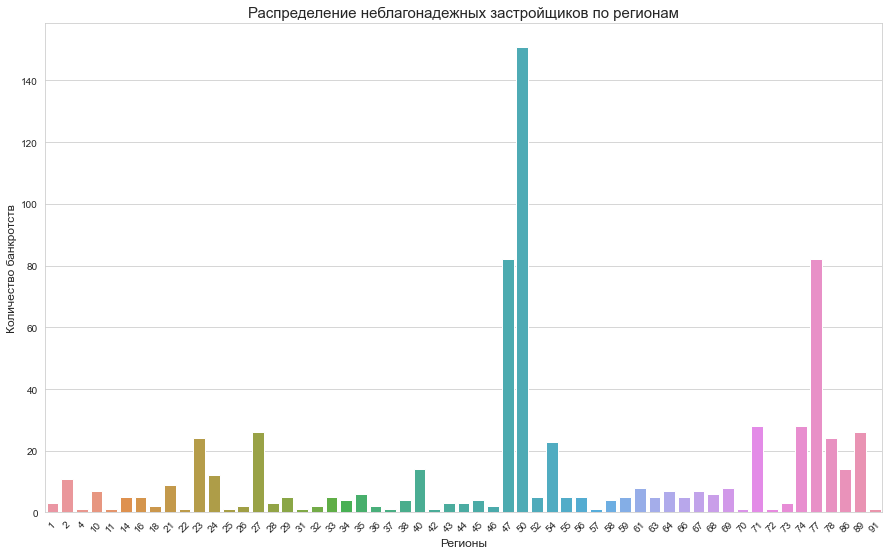

In [18]:
plt.figure(figsize=(15, 9))
pl = sns.barplot(data=df[df.developer_bankrupt_date > '1900-01-01'].groupby('region', as_index=False)\
                        .agg({'id' : 'count'})\
                        .rename(columns={'id': 'count_of_bankrupts'}),
                x='region', y='count_of_bankrupts')
pl.xaxis.set_tick_params(rotation=45)
pl.set_ylabel('Количество банкротств', fontsize=12)
pl.set_xlabel('Регионы', fontsize=12)
plt.title('Распределение неблагонадежных застройщиков по регионам',fontsize=15)
plt.show()

В антилидерах по количеству проблемных застройщиков Московская область, Ленинградская область и Москва

# Информация по объектам

In [19]:
df.head()

,id,region,floorMin,floorMax,flat_count,ready_status,date_obj_ready,build_type,wall_material,flat_finish_type,...,playground,sportground,trash_area,guest_parking_on_territory,guest_parking_outside,wheelchair_elevator,passenger_elevator,cargo_elevator,developer_bankrupt_stage,developer_bankrupt_date
0,7,77,21.0,21.0,0.0,Сдан,2019-04-09,0,Другое,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaT
1,8,77,2.0,15.0,1553.0,Сдан,2019-12-12,1,Панель,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaT
2,9,50,NaN,NaN,108.0,Сдан,2018-12-14,1,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaT
3,10,77,NaN,NaN,1376.0,Сдан,2019-03-25,1,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaT
4,11,77,NaN,NaN,709.0,Сдан,2018-12-12,1,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaT


In [20]:
grouped_region = df.groupby(['region'], as_index=False).agg({
    'id' : 'count', 'objPriceAvg' : 'mean', 'flat_square' : 'mean'
}).rename(columns={'objPriceAvg' : 'price_avg_group', 'id' : 'count_of_flats'})\
    .sort_values('price_avg_group', ascending=False)

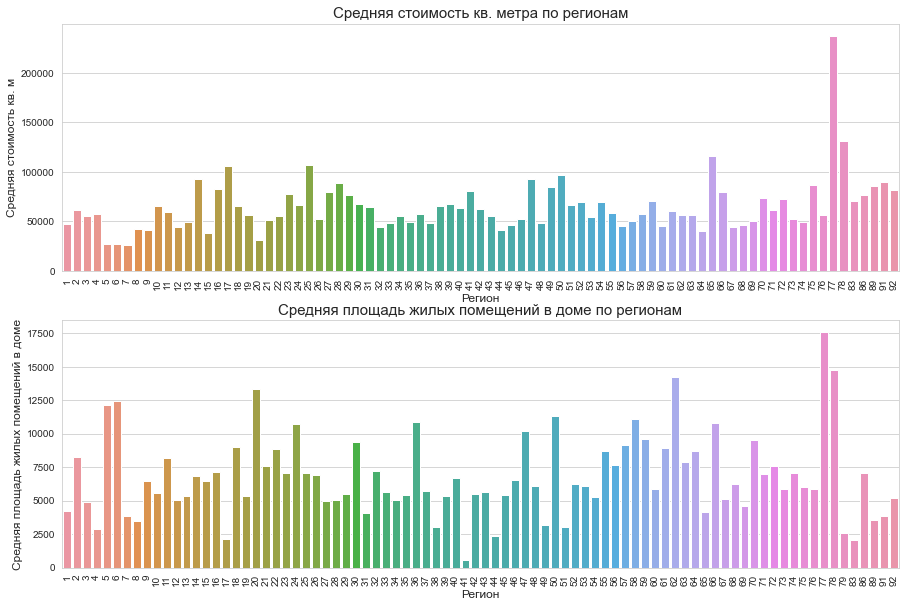

In [21]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(15, 10))
ax1, ax2 = ax


sns.barplot(data=grouped_region.dropna(),
                x='region', y='price_avg_group', ax=ax1)


sns.barplot(data=grouped_region,
                x='region', y='flat_square', ax=ax2)


ax1.set_ylabel('Средняя стоимость кв. м', fontsize=12)
ax1.set_xlabel('Регион', fontsize=12)
ax1.set_title('Средняя стоимость кв. метра по регионам', fontsize=15)
ax1.xaxis.set_tick_params(rotation=90)

ax2.set_ylabel('Средняя площадь жилых помещений в доме', fontsize=12)
ax2.set_xlabel('Регион', fontsize=12)
ax2.set_title('Средняя площадь жилых помещений в доме по регионам', fontsize=15)
ax2.xaxis.set_tick_params(rotation=90)

plt.show()

По стоимости за 1 кв. м лидирует с большим отрывом Москва, далее идет СПБ и замыкает тройку лидеров Сахалинская область.
По средней площади ЖК первые 2 места не поменялись, на 3е место вышла Рязанская область и немного отстает Чечня

In [22]:
grouped_region.sort_values('flat_square', ascending=False).head(4)

,region,count_of_flats,price_avg_group,flat_square
76,77,2119,237404.684315,17582.009632
77,78,1722,131151.452481,14794.050557
61,62,193,57039.218978,14214.874922
19,20,28,30907.700000,13349.360714


In [23]:
grouped_region.head(3)

,region,count_of_flats,price_avg_group,flat_square
76,77,2119,237404.684315,17582.009632
77,78,1722,131151.452481,14794.050557
64,65,150,115853.759036,4157.562333


In [7]:
grouped_region = df.copy()
grouped_region['year_obj_ready'] = pd.DatetimeIndex(grouped_region.date_obj_ready).year

grouped_region = grouped_region.groupby(['year_obj_ready', 'region'], as_index=False)\
            .agg({'flat_square' : 'sum'}).rename(columns={'flat_square' : 'square_in_region'})\
            .sort_values('year_obj_ready', ascending=False)

In [8]:
grouped_region.year_obj_ready = grouped_region.year_obj_ready.apply(int)

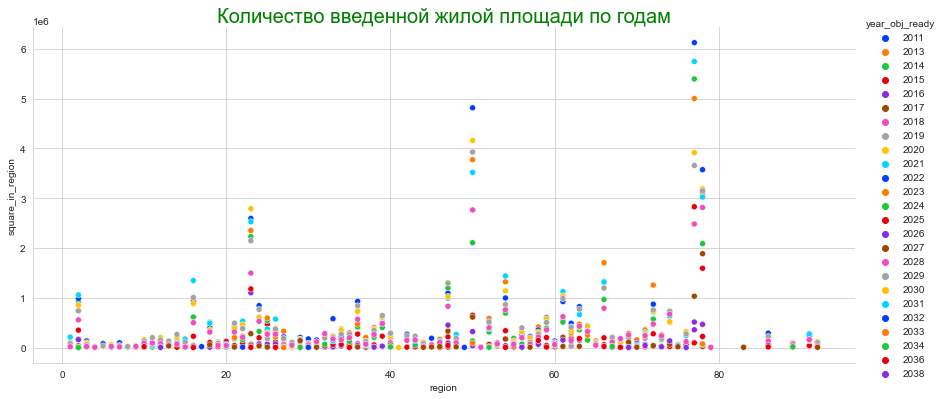

In [11]:
sns.relplot(
    x='region',
    y='square_in_region',
    hue='year_obj_ready',
    aspect=2.2,
    height=5.5,
    palette="bright",
    legend='full',
    data=grouped_region[grouped_region.square_in_region > 0])
plt.title('Количество введенной жилой площади по годам', size=20, color='g');

В соответствии с графиком, в среднем, больше всего площадей вводится в Москве, Московской области, СПб. 4-е место по объемам ввода занимает Краснодарский край.
Наиболее успешным годом для застройщиков из первой тройки регионов является 2022 год. В Краснодарском крае - это был 2020

# Посмотрим соотношение комнатности квартир в экономе и элит жилье на примере Москвы
(более наглядное сравнение, т.к. другие регионы нивелируют разницу)

In [27]:
"""
Создадим датасет, чтобы если еще что-то понадобится, обращаться к нему
"""
class_and_flats = df[['region', 'class', 'total_1k', 'total_2k', 'total_3k', 'total_4k', 'avg_flat_on_floor']].dropna()

In [70]:
"""
Сгруппируем значения по региону и классу
"""
class_and_region = class_and_flats.groupby(['region', 'class']).agg({'total_1k' : 'mean',
                                                  'total_2k' : 'mean',
                                                  'total_3k' : 'mean',
                                                  'total_4k' : 'mean',
                                                  'avg_flat_on_floor' : 'mean'
                                                  })\
                    .rename(columns={'total_1k' : 'avg_1k',
                                     'total_2k' : 'avg_2k',
                                     'total_3k' : 'avg_3k',
                                     'total_4k' : 'avg_4k',
                                     'avg_flat_on_floor' : 'mean_flat_on_floor'
                                     })
class_and_region.mean_flat_on_floor = class_and_region.mean_flat_on_floor.round()
class_and_region.head()

avg_1k     avg_2k     avg_3k    avg_4k  mean_flat_on_floor
region class                                                                  
1      Бизнес   107.000000  55.666667  42.000000  2.000000                 7.0
       Другое    84.000000  14.000000   0.000000  0.000000                10.0
       Комфорт  121.192308  55.884615   9.153846  0.230769                 8.0
       Типовой   65.240000  20.210000   4.160000  0.000000                 8.0
       Элитный   65.000000  39.000000  14.000000  0.000000                 5.0

In [29]:
"""
Преобразуем значения колонок в процентый вид
"""
for i in list(class_and_region)[:-1]:
    class_and_region[i] = (class_and_region[i] / (class_and_region.avg_1k\
                                                     + class_and_region.avg_2k\
                                                     + class_and_region.avg_3k\
                                                     + class_and_region.avg_4k)).mul(100).round(2)

In [60]:
"""
Сбросим индекс, чтобы обращаться к нему как к колонкам
"""
class_and_region = class_and_region.reset_index()

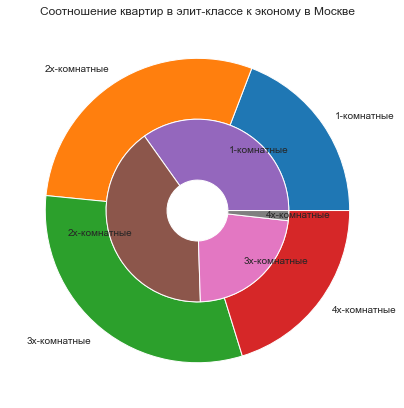

In [31]:
"""
Выгрузим значения по комнатности квартир в переменные и построим график
"""

avg_1k = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Элитный")]['avg_1k']
avg_2k = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Элитный")]['avg_2k']
avg_3k = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Элитный")]['avg_3k']
avg_4k = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Элитный")]['avg_4k']

avg_1kt = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Типовой")]['avg_1k']
avg_2kt = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Типовой")]['avg_2k']
avg_3kt = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Типовой")]['avg_3k']
avg_4kt = class_and_region[(class_and_region.region == 77) & (class_and_region['class'] == "Типовой")]['avg_4k']

v1 = [float(avg_1k), float(avg_2k), float(avg_3k), float(avg_4k)]
v2 = [float(avg_1kt), float(avg_2kt), float(avg_3kt), float(avg_4kt)]

labels = ["1-комнатные", "2х-комнатные", "3х-комнатные", "4х-комнатные"]

plt.figure(figsize=(7, 7))
width = 0.4
wedge_properties = {"width":width}
plt.pie(v1, labels=labels, wedgeprops=wedge_properties)
plt.pie(v2, labels=labels, labeldistance=0.75,
        radius=1-width, wedgeprops=wedge_properties)
plt.title("Соотношение квартир в элит-классе к эконому в Москве")
plt.show()

Как видим из графика есть разительное отличие в количестве 4х-комнатных квартир в элитном классе.
В типовом жилье преобладают однокомнатные квартиры, в то время как в элитном, однокомнатные квартиры занимают наименьшую долю.
Соотношение 2х- и 3х-комнатных квартир в элитном жилье примерно одинаковое.
В эконом жилье с повышением комнатности доля таких квартир падает. 4-х комнатных квартир ничтожно малое количество

In [71]:
"""
Сгруппируем значения по региону и классу
"""
class_and_region = class_and_flats.groupby(['region', 'class']).agg({'total_1k' : 'mean',
                                                  'total_2k' : 'mean',
                                                  'total_3k' : 'mean',
                                                  'total_4k' : 'mean',
                                                  'avg_flat_on_floor' : 'mean'
                                                  })\
                    .rename(columns={'total_1k' : 'avg_1k',
                                     'total_2k' : 'avg_2k',
                                     'total_3k' : 'avg_3k',
                                     'total_4k' : 'avg_4k',
                                     'avg_flat_on_floor' : 'mean_flat_on_floor'
                                     })
class_and_region.mean_flat_on_floor = class_and_region.mean_flat_on_floor.round()
class_and_region = class_and_region.reset_index()
class_and_region.head()

,region,class,avg_1k,avg_2k,avg_3k,avg_4k,mean_flat_on_floor
0,1,Бизнес,107.000000,55.666667,42.000000,2.000000,7.0
1,1,Другое,84.000000,14.000000,0.000000,0.000000,10.0
2,1,Комфорт,121.192308,55.884615,9.153846,0.230769,8.0
3,1,Типовой,65.240000,20.210000,4.160000,0.000000,8.0
4,1,Элитный,65.000000,39.000000,14.000000,0.000000,5.0


In [74]:
class_and_region.replace(to_replace=0, value=1, inplace=True)
class_and_region.head()

,region,class,avg_1k,avg_2k,avg_3k,avg_4k,mean_flat_on_floor
0,1,Бизнес,107.000000,55.666667,42.000000,2.000000,7.0
1,1,Другое,84.000000,14.000000,1.000000,1.000000,10.0
2,1,Комфорт,121.192308,55.884615,9.153846,0.230769,8.0
3,1,Типовой,65.240000,20.210000,4.160000,1.000000,8.0
4,1,Элитный,65.000000,39.000000,14.000000,1.000000,5.0


In [83]:
a = class_and_region.avg_4k[(class_and_region['class'] == "Элитный") == (class_and_region.region['class'] == "Бизнес")]
a

KeyError: 'class'

In [77]:
class_and_region.avg_4k[class_and_region['class'] == "Бизнес"]

0       2.000000
5      15.320000
10      3.000000
15      1.000000
20      1.000000
         ...    
321    11.024540
331     1.000000
335     1.000000
339     4.888889
344     1.000000
Name: avg_4k, Length: 63, dtype: float64

In [76]:
class_and_region.avg_4k[class_and_region['class'] == "Элитный"]

4       1.000000
9      13.500000
13      1.000000
19      1.000000
27     20.666667
33      2.000000
38      1.750000
55      1.000000
60      6.250000
67      5.000000
79      1.000000
84      7.000000
89      2.700000
94     26.400000
99     44.500000
104     3.200000
116     0.625000
119     1.000000
128     0.857143
133     3.000000
138     4.666667
143     6.000000
147    12.500000
156     1.000000
161     1.166667
170     1.000000
175     3.333333
179     1.000000
183     1.000000
192     5.200000
197     3.500000
203     0.500000
209     9.200000
217    10.941176
222     2.000000
234     1.500000
239     4.000000
244     5.000000
249     6.833333
254     1.666667
259     6.545455
263     1.000000
272    10.400000
280     3.250000
285     1.000000
293     1.000000
298     5.833333
303     1.000000
315     1.000000
320    33.319328
325    26.682927
343     1.000000
Name: avg_4k, dtype: float64